# BANK APP REVIEWS - BOA

In [82]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [83]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [84]:
warnings.filterwarnings("ignore")

In [85]:
# variable
BANK="BOA"

In [86]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [87]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/BOA_raw_reviews.csv (type=csv)


INFO:data.load_data:Data loaded successfully. Shape: (500, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
1,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,https://play-lh.googleusercontent.com/a/ACg8oc...,exceptional,5,0,NaN,2025-06-03 10:32:35,NaN,NaN
2,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,NaN,NaN
3,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,https://play-lh.googleusercontent.com/a-/ALV-U...,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,NaN,NaN
4,8cd852da-0257-4ca0-9003-314fb464e55a,Fentaw Kefyalew,https://play-lh.googleusercontent.com/a-/ALV-U...,This App is not interest for Android phone Ple...,1,0,NaN,2025-06-01 10:17:10,NaN,NaN


### Dataset Overview

In [88]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
187,87a5eda7-9ff6-43ca-a3d4-baf44802a3dc,Est,https://play-lh.googleusercontent.com/a-/ALV-U...,GOAT 🐐 🐐,5,1,24.09.30,2024-11-19 16:48:41,NaN,NaN
315,feea8767-74e7-472a-81ba-7c8968b67b14,Abeba Berha,https://play-lh.googleusercontent.com/a/ACg8oc...,Boa,4,0,24.11.22,2025-01-18 16:17:34,NaN,NaN
87,ab7b2d7e-b707-4546-b9ec-ad0da2cb9015,Demlash Demlash,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow,4,0,NaN,2025-03-05 21:58:05,NaN,NaN
47,94d9f11f-f866-4439-a91b-c258140070e7,Estifanos Afework,https://play-lh.googleusercontent.com/a-/ALV-U...,like,5,1,25.03.07,2025-04-06 22:17:21,NaN,NaN
78,a9e99120-460c-4cc0-8978-d1d601b89258,Merkeb Bonitua,https://play-lh.googleusercontent.com/a/ACg8oc...,BoA,5,0,24.11.22,2025-03-11 10:51:57,NaN,NaN
484,1cfcfa11-67f5-4315-9f2d-f47ab27f0910,abrar yasin,https://play-lh.googleusercontent.com/a/ACg8oc...,Wonderfull app,5,0,NaN,2025-03-08 10:23:26,NaN,NaN
85,c292d2f8-1e0d-46ae-97f2-f3215a0bdf50,Djejaydh Sj4ydudg,https://play-lh.googleusercontent.com/a/ACg8oc...,i can't use this app why?,5,0,24.11.22,2025-03-07 14:28:00,NaN,NaN
22,b640cc87-df88-4b6b-9b9f-13fe0bdd5dfa,fire biru,https://play-lh.googleusercontent.com/a/ACg8oc...,"this app does no work on Samsung a51, it just ...",1,0,24.09.30,2025-05-11 19:07:08,NaN,NaN
195,6446c637-4d71-4aa9-b09c-abcc44110734,legese sis,https://play-lh.googleusercontent.com/a-/ALV-U...,i find it interesting specially in reciept dow...,1,0,NaN,2024-11-12 16:43:41,NaN,NaN
440,527633dc-326a-40d3-8f50-663f5a355aee,Amanuel fitiwi,https://play-lh.googleusercontent.com/a/ACg8oc...,great boa,5,0,NaN,2025-04-10 14:33:26,NaN,NaN


In [89]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
495,d5e46c35-6bbf-4ce7-b184-cdc4c1e0eab1,Diriba Desu,https://play-lh.googleusercontent.com/a/ACg8oc...,Verry Amazing App from all IB,5,0,NaN,2025-03-01 11:35:08,NaN,NaN
496,99172a2f-926c-48be-a1b0-3971b984b6b2,Zenebe Abebe,https://play-lh.googleusercontent.com/a-/ALV-U...,Not working on this days,1,0,24.11.22,2025-02-26 13:29:28,NaN,NaN
497,781ff61a-6f89-4bb1-a455-9b66400b0cd7,fitsum tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Thank you BoA,5,1,24.11.22,2025-02-23 11:06:47,NaN,NaN
498,cf026bee-94e7-4b9c-8a46-034354f9d171,Eshetu Amsal,https://play-lh.googleusercontent.com/a/ACg8oc...,best banking app in the wworld,5,1,NaN,2025-02-22 19:58:17,NaN,NaN
499,9035f28b-9646-4fe9-80e1-6b6926b0289e,Yebelay Getnet,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice app and it's easy to use,5,2,24.11.22,2025-02-21 12:41:42,NaN,NaN


In [90]:
#shape of the dataset
df.shape

(500, 10)

In [91]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [92]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,500.0,3.254,1.855902,1.0,1.0,4.0,5.0,5.0
thumbsUpCount,500.0,4.814,29.486307,0.0,0.0,1.0,1.0,425.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,500,200,3559b91c-fad9-4032-bebe-cf99974b9628,3
userName,500,200,Robel Alebachew,3
userImage,500,200,https://play-lh.googleusercontent.com/a/ACg8oc...,3
content,500,177,good,29
reviewCreatedVersion,349,7,24.11.22,159
at,500,200,2025-06-03 16:21:34,3


In [94]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              500 non-null    object 
 1   userName              500 non-null    object 
 2   userImage             500 non-null    object 
 3   content               500 non-null    object 
 4   score                 500 non-null    int64  
 5   thumbsUpCount         500 non-null    int64  
 6   reviewCreatedVersion  349 non-null    object 
 7   at                    500 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [95]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                200
userName                200
userImage               200
at                      200
content                 177
thumbsUpCount            18
reviewCreatedVersion      7
score                     5
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [96]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [97]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,151,30.20%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [98]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,151,30.20%


### Duplicates

In [99]:
#count duplicates
dq.count_duplicates()

300

In [100]:
#look at the duplicates
dq.display_duplicates().sample(10)

[INFO] Found 300 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
436,e523c50a-6f8f-4653-ad4d-5122ef8ddb9a,Wase Kedir,https://play-lh.googleusercontent.com/a/ACg8oc...,Best,2,0,25.03.07,2025-04-19 18:38:02,NaN,NaN
335,800bc191-3aec-4666-9f08-4a393dc8501f,Sisay Tesfa,https://play-lh.googleusercontent.com/a/ACg8oc...,By assessing this you can tell Abyssinia bank ...,1,0,NaN,2025-01-02 15:31:28,NaN,NaN
322,1c339143-79e1-4f37-9ea7-398b7844903b,Abdisa BirUK,https://play-lh.googleusercontent.com/a/ACg8oc...,It keeps asking me to turn off developer mode ...,1,6,24.11.22,2025-01-13 15:45:23,NaN,NaN
205,d9172c66-a605-4626-acc6-e1dbca0685cd,Mansour Abdulkadir,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA system is confartable,5,0,25.05.03,2025-06-01 00:47:32,NaN,NaN
363,2795b1e3-ccdc-4b4a-8c25-cd4c6cc0d2ba,Matias Kebede,https://play-lh.googleusercontent.com/a-/ALV-U...,It has been a while since you guys started giv...,1,19,24.11.22,2024-12-10 09:43:57,NaN,NaN
210,9198a5bc-f914-4a18-ad44-d2b77094c02a,Mabratu Tesfaye,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,25.05.03,2025-05-22 15:34:58,NaN,NaN
393,295d2e05-79ca-409a-be45-0388efa2f3b6,Yohannes Demerew,https://play-lh.googleusercontent.com/a/ACg8oc...,❤❤❤❤❤❤,5,1,24.09.30,2024-11-12 21:39:07,NaN,NaN
414,86456197-428d-45e1-9c00-8dd85dcbb9e9,Deginet Zeleke E,https://play-lh.googleusercontent.com/a/ACg8oc...,BoA,2,0,NaN,2025-05-20 15:21:55,NaN,NaN
312,7b07593c-a036-477b-b2d4-4e53fdc4c75e,Mohammed Duri,https://play-lh.googleusercontent.com/a-/ALV-U...,I can't dijitalize my atm in the apollo app on...,1,1,24.11.22,2025-01-22 06:05:22,NaN,NaN
216,8ddf5c9f-f866-4817-ac5e-85c67bfa870e,Usu Elemo,https://play-lh.googleusercontent.com/a/ACg8oc...,but not opening on android,4,0,NaN,2025-05-19 17:19:32,NaN,NaN


### Invalid Values

In [101]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [102]:
#saving the original dataset for later use
df_original=df.copy()

In [103]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 300 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
119,46c41e87-0d7a-491b-8641-2c1acdaddea3,Milkyas theodros,https://play-lh.googleusercontent.com/a/ACg8oc...,Horrible customer service and app crashes Horr...,1,2,24.11.22,2025-01-15 13:24:17,NaN,NaN
187,87a5eda7-9ff6-43ca-a3d4-baf44802a3dc,Est,https://play-lh.googleusercontent.com/a-/ALV-U...,GOAT 🐐 🐐,5,1,24.09.30,2024-11-19 16:48:41,NaN,NaN
124,5055c357-676d-41eb-824d-48f9e78f41e7,No Bad,https://play-lh.googleusercontent.com/a/ACg8oc...,Like to much,5,1,24.11.22,2025-01-11 10:43:49,NaN,NaN
164,93bee220-7c85-4d30-ba6f-c8168c201b5a,Siem Kibrom,https://play-lh.googleusercontent.com/a-/ALV-U...,This is the best app; many features are awesom...,4,38,24.11.22,2024-12-08 23:16:05,NaN,NaN
89,ab512ec6-2eaa-496c-b0a9-ee21a2d810be,GENENE NUSI,https://play-lh.googleusercontent.com/a-/ALV-U...,AGA B Girja Miss language of admin Afaan oromo...,1,0,NaN,2025-03-04 20:03:40,NaN,NaN


In [104]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [105]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
148,2e488711-7c0b-4546-b00a-bc58f90177dd,Lemuk,https://play-lh.googleusercontent.com/a-/ALV-U...,አይሰራም ሼም ነው፤,1,0,24.11.22,2024-12-23 17:03:45,NaN,NaN
96,99172a2f-926c-48be-a1b0-3971b984b6b2,Zenebe Abebe,https://play-lh.googleusercontent.com/a-/ALV-U...,Not working on this days,1,0,24.11.22,2025-02-26 13:29:28,NaN,NaN
120,9f4f98fc-8a93-414d-9219-f03dbebaf5b0,Yishak Wondafrash,https://play-lh.googleusercontent.com/a-/ALV-U...,I love it,5,1,24.11.22,2025-01-14 11:17:47,NaN,NaN
135,800bc191-3aec-4666-9f08-4a393dc8501f,Sisay Tesfa,https://play-lh.googleusercontent.com/a/ACg8oc...,By assessing this you can tell Abyssinia bank ...,1,0,NaN,2025-01-02 15:31:28,NaN,NaN
192,f106cb33-9dcb-4a38-a65d-3cbb1a9a790e,abay,https://play-lh.googleusercontent.com/a/ACg8oc...,One of the poorest mobile banking system,1,0,24.09.30,2024-11-13 13:35:40,NaN,NaN


In [106]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [107]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [108]:
dq.find_invalid_values()

{}

In [109]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [110]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=Wow "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=fr&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=exceptional "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=BoA+Mobile+good+bank "HTTP/2 200 OK"
INFO:httpx:HTTP Reques

In [111]:
df.shape

(200, 5)

### Inconsistencies and Inaccuracies

In [112]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [113]:
df=dq.convert_columns_to_datetime()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       200 non-null    object
 1   content        200 non-null    object
 2   score          200 non-null    int64 
 3   thumbsUpCount  200 non-null    int64 
 4   at             200 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.4+ KB


In [115]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [116]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [117]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [118]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
50,after i typed in my password it says successfu...,2,2025-04-04 12:38:08,yonas gebre,2,BOA,Google Store
114,Prayer,5,2025-01-21 12:47:47,Segni Tufa,1,BOA,Google Store
196,it good,5,2024-11-12 15:50:38,Feven Tekle,1,BOA,Google Store
106,,5,2025-02-04 08:48:51,Nati,1,BOA,Google Store
97,Thank you BoA,5,2025-02-23 11:06:47,fitsum tesfaye,1,BOA,Google Store
12,Good,5,2025-05-21 19:16:49,Fikadu Netsere,0,BOA,Google Store
88,bro the worst app made by human kind!! as a so...,1,2025-03-05 15:03:56,Tarik Teshome,0,BOA,Google Store
19,Excellent app,4,2025-05-16 21:34:42,EYOB FASIL ALEMAYEHU,0,BOA,Google Store
146,Nice,5,2024-12-26 19:09:33,አሙራ Amura tube,1,BOA,Google Store
49,the app gets a considerable improvements like ...,5,2025-04-04 22:57:29,Esubalew Yismaw,20,BOA,Google Store


### Export Cleaned Data

In [119]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze & Visualize

In [120]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


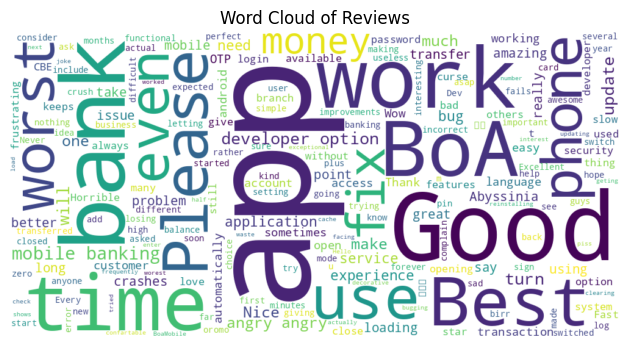

In [121]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


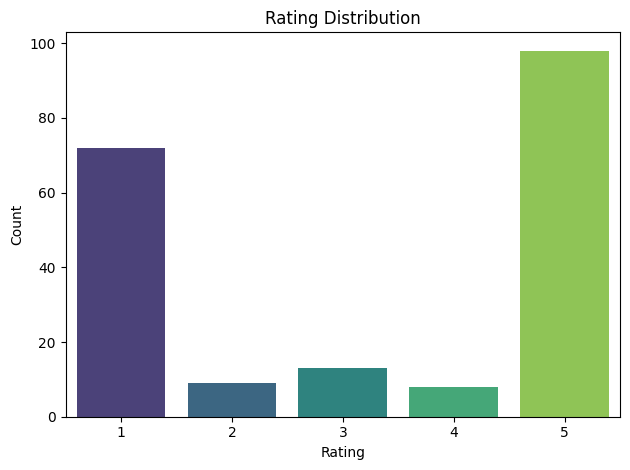

In [122]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


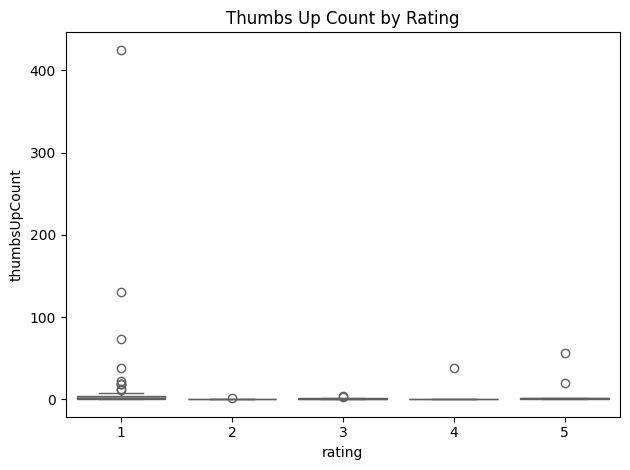

In [123]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


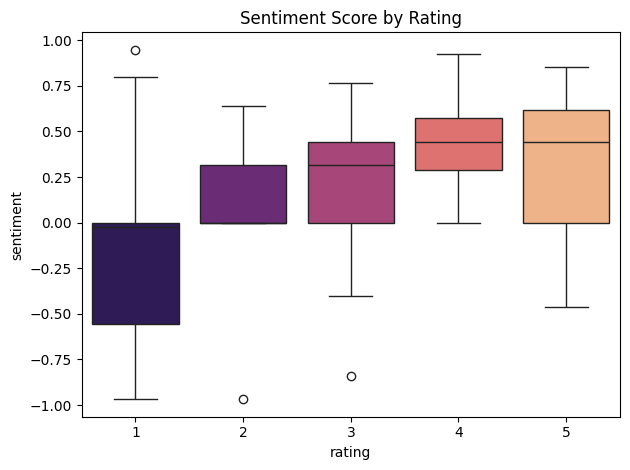

In [124]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [125]:
df.sample(15)

,review,rating,date,userName,thumbsUpCount,bank,source
161,Very Nice,5,2024-12-13 10:57:24,معتصم بن يحي,1,BOA,Google Store
199,I need a support the app is not working,5,2024-11-12 13:10:33,Habtu Teum Ayele,1,BOA,Google Store
38,Yider,1,2025-04-18 00:18:40,Mule Negte,0,BOA,Google Store
74,Loved it,5,2025-03-14 17:57:04,Muluken Sewunet,1,BOA,Google Store
90,Good app,5,2025-03-03 16:47:22,ᴀʙᴅᴜ sᴇɪᴅ ᴀʟɪ,0,BOA,Google Store
197,"This app crashes everytime, please fix it",1,2024-11-12 15:08:59,Yoseph Seyoum,0,BOA,Google Store
138,Best,5,2025-01-01 19:59:05,sofonyas eyob,1,BOA,Google Store
17,Worst App ever. Totally unreliable. And it did...,1,2025-05-18 15:36:47,Dagar,4,BOA,Google Store
178,,5,2024-11-24 21:31:39,Abraham Kinfegebreal,1,BOA,Google Store
110,Always do update and that is annoying,3,2025-01-27 09:11:12,Mesfin Wegayehu,0,BOA,Google Store


In [126]:
dff=pd.read_csv('../../data/processed/BOA_cleaned_reviews.csv')

In [127]:
dff.sample(15)

,review,rating,date,bank,source
198,I need a support the app is not working,5,2024-11-12,BOA,Google Play
31,wow,5,2025-04-28,BOA,Google Play
1,exceptional,5,2025-06-03,BOA,Google Play
126,The best of best,5,2025-01-09,BOA,Google Play
24,i entered incorrect security question by mista...,5,2025-05-10,BOA,Google Play
78,"Decent, but there problems sometimes it says e...",3,2025-03-11,BOA,Google Play
74,Wow,1,2025-03-14,BOA,Google Play
149,Fine,5,2024-12-21,BOA,Google Play
150,The dirtiest application ever seen...,1,2024-12-20,BOA,Google Play
88,AGA B Girja Miss language of admin Afaan oromo...,1,2025-03-04,BOA,Google Play
